In [50]:
from keras import *
from keras.models import Model
import tensorflow as tf

In [51]:
import cv2
img = cv2.imread('/content/dog.png')

In [52]:
img.shape

(418, 507, 3)

In [53]:
img = cv2.resize(img, (256,256))

In [54]:
img.shape

(256, 256, 3)

In [55]:
from google.colab.patches import cv2_imshow

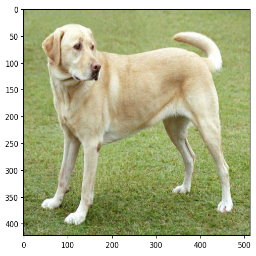

In [56]:
cv2_imshow(img)

In [57]:
img1 = cv2.imread('/content/sketch.png')
img1 = cv2.resize(img1, (256,256))

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Conv2DTranspose
from keras import *

In [59]:
from keras.layers import concatenate
# model_from_json(model_file, custom_objects={'concatenate': concatenate})

In [60]:
out = cv2.imread('/content/output.png')
out = cv2.resize(out,(252,252))

In [61]:
out = tf.cast(out/255, tf.float32)

In [62]:
print(img.shape)
print(img1.shape)
print(out.shape)

(256, 256, 3)
(256, 256, 3)
(252, 252, 3)


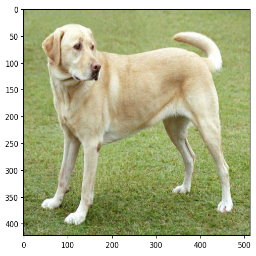

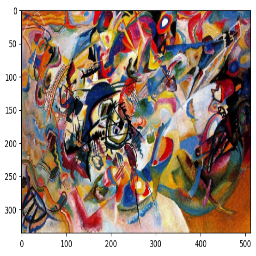

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_30 (Conv2D)          (None, 254, 254, 512)        14336     ['input_7[0][0]']             
                                                                                                  
 conv2d_31 (Conv2D)          (None, 254, 254, 512)        14336     ['input_8[0][0]']             
                                                                                            

In [63]:
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, concatenate
from tensorflow.keras.models import Model

# Load and resize images
img = cv2.imread('/content/dog.png')
img = cv2.resize(img, (256, 256))

img1 = cv2.imread('/content/sketch.png')
img1 = cv2.resize(img1, (256, 256))

out = cv2.imread('/content/output.png')
out = cv2.resize(out, (246,246))

from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2_imshow(img1)

# Cast images to float32 and normalize
img = tf.cast(img / 255, tf.float32)
img1 = tf.cast(img1 / 255, tf.float32)
out = tf.cast(out / 255, tf.float32)

# Add batch dimension
img = tf.expand_dims(img, axis=0)
img1 = tf.expand_dims(img1, axis=0)
out = tf.expand_dims(out, axis =0)

# Building non-sequential model
inputA = Input(shape=(256, 256, 3))
inputB = Input(shape=(256, 256, 3))

x = Conv2D(512, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3))(inputA)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(x)
x1 = Conv2D(512, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3))(inputB)
# x1 = BatchNormalization()(x1)
# x1 = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(x1)

a = Conv2D(400, kernel_size=(3, 3), padding='valid', activation='relu')(x)
# a = BatchNormalization()(a)
# a = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(a)
b = Conv2D(400, kernel_size=(3,3), padding = 'valid', activation='relu')(x1)
# b = BatchNormalization()(b)
# b = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(b)

combined = concatenate([a, b])

y = Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu')(combined)
# y = BatchNormalization()(y)
# y = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(y)

z = Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu')(y)  # Number of neurons in layer z is 32
# z = BatchNormalization()(z)
# z = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(z)

t = Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu')(z)
# t = BatchNormalization()(t)
# t = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(t)

p = Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu')(t)
# p = BatchNormalization()(p)
# p = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(p)

q = Conv2D(16, kernel_size=(3, 3), padding='valid', activation='relu')(t)
# q = BatchNormalization()(q)
# q = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(q)

r = Conv2D(8, kernel_size=(3, 3), padding='valid', activation='relu')(t)
# r = BatchNormalization()(r)
# r = MaxPooling2D(pool_size = (2,2), strides = 1, padding = 'valid')(r)

# Output layer with Conv2DTranspose to produce an image
output_image = Conv2DTranspose(3, kernel_size=(3, 3), padding='valid', activation='relu')(r)

model = Model(inputs=[inputA, inputB], outputs=output_image)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])  # Use 'mse' loss for image generation

#Model summary
model.summary()

# Train model
model.fit([img, img1], out, epochs=10)


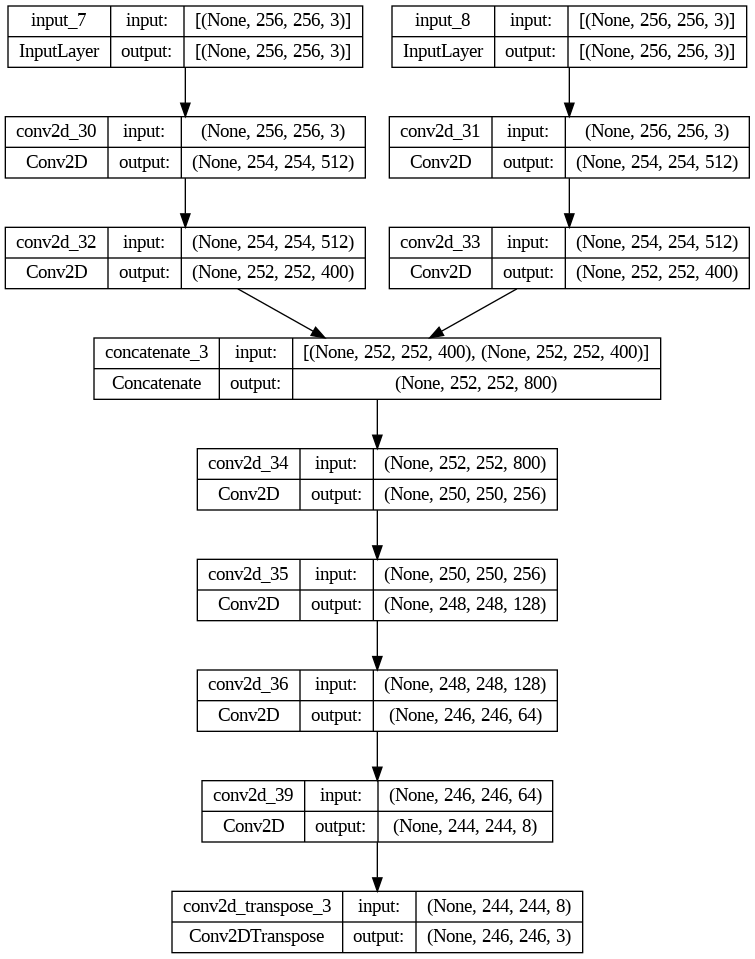

In [64]:

from keras.utils import plot_model
plot_model(model, show_shapes = True)

In [65]:
#Model prediction
generated = model.predict([img, img1])

1/1 [==============================] - 0s 172ms/step


In [66]:
from google.colab.patches import cv2_imshow
print(generated.shape)
tf.squeeze(generated)
print(generated.shape)

(1, 246, 246, 3)
(1, 246, 246, 3)


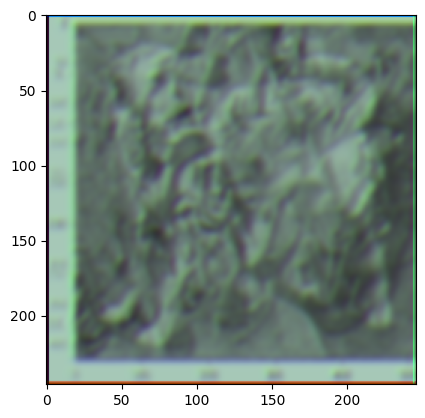

In [67]:
import matplotlib.pyplot as plt
plt.imshow(tf.squeeze(generated))